In [1]:
# importing packages
import pandas as pd
import numpy as np
import os

## Import CSV File as a Dataframe

In [2]:
#import my csv file
df_original = pd.read_csv(r"C:\Users\Justin Schwerdt\Documents\data-analytics-projects\video-game-sales\orig-sales-data.csv.csv",index_col=None)
df = df_original

# Cleaning the Data

In [3]:
#reviewing initial dataframe
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Removing Unused Columns

In [4]:
#removing columns i dont want
df = df.iloc[:,:10]


## Renaming Columns

In [5]:
#setting columns to lower for easier coding
df.columns = df.columns.str.lower()

## Checking for Null Values

In [6]:
#checking for nan values per column
df.isnull().sum()

name                 2
platform             0
year_of_release    269
genre                2
publisher           54
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
global_sales         0
dtype: int64

## Dealing with Null Values

In [7]:
#droping rows without a name
df = df.dropna(subset=['name'])

In [8]:
#dealing with missing years
df['year_of_release'] = df['year_of_release'].fillna(value=0)

In [9]:
#setting nan publisher to 'unknown'
df['publisher'] = df['publisher'].fillna(value='unknown')

In [10]:
#checking end results of dealing with nan values
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
publisher          0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
global_sales       0
dtype: int64

## Changing Datatypes

In [11]:
#change year to int instead of float
df['year_of_release'] = df['year_of_release'].astype(int)

## Check Cleaned Dataframe

In [12]:
#checking df for more cleaning needed
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Export Cleaned Dataframe as CSV

In [13]:
#export cleaned dataframe
df.to_csv(r'C:\Users\Justin Schwerdt\Documents\data-analytics-projects\video-game-sales\cleaned-sales-data-df', index=False)

# Which country had the top global sales?

In [14]:
#sum NA sales
df['na_sales'].sum()

4400.84

In [15]:
#sum EU sales
df['eu_sales'].sum()

2424.1400000000003

In [16]:
#sum EU sales
df['eu_sales'].sum()

2424.1400000000003

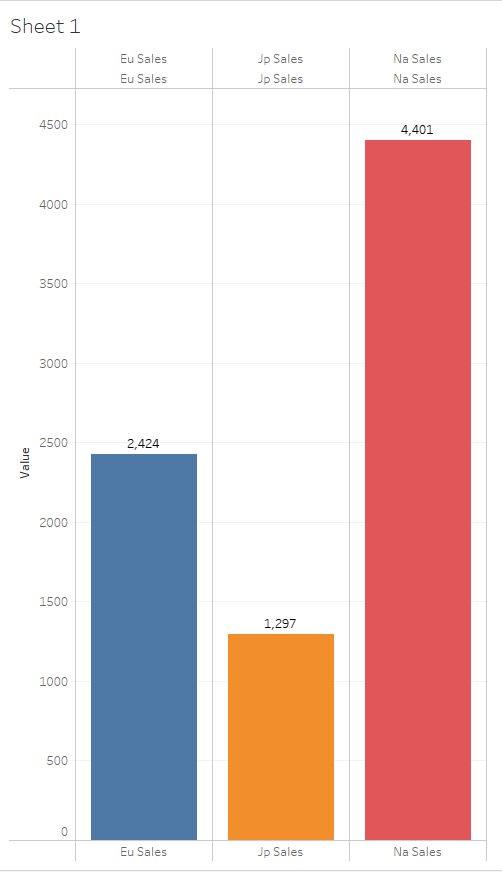

# Which genre has the top sales in na?

In [17]:
#group by genre and sum the na sales
genre_na_sales = df.groupby(["genre"]).na_sales.sum()

In [18]:
#na genre sales output
genre_na_sales

genre
Action          879.01
Adventure       105.26
Fighting        223.36
Misc            407.27
Platform        445.50
Puzzle          122.87
Racing          359.35
Role-Playing    330.81
Shooter         592.24
Simulation      182.19
Sports          684.43
Strategy         68.55
Name: na_sales, dtype: float64

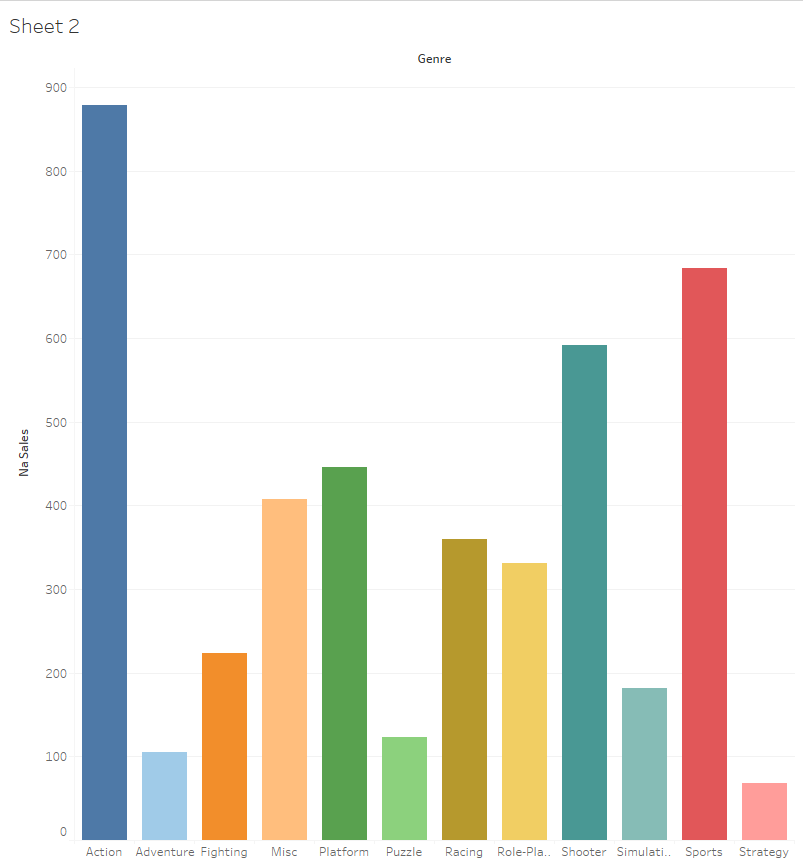

# Does the year of release affect overall sales?

In [19]:
#group by year of release and sum global sales
global_sales_by_year = df.groupby(["year_of_release"]).global_sales.sum()

In [20]:
global_sales_by_year

year_of_release
0        98.96
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.17
1993     45.98
1994     79.18
1995     88.11
1996    199.15
1997    200.98
1998    256.45
1999    251.25
2000    201.58
2001    331.47
2002    395.51
2003    357.80
2004    419.05
2005    458.31
2006    518.22
2007    605.37
2008    671.79
2009    658.88
2010    590.59
2011    507.79
2012    355.84
2013    361.24
2014    331.51
2015    268.05
2016    130.10
2017      0.06
2020      0.29
Name: global_sales, dtype: float64

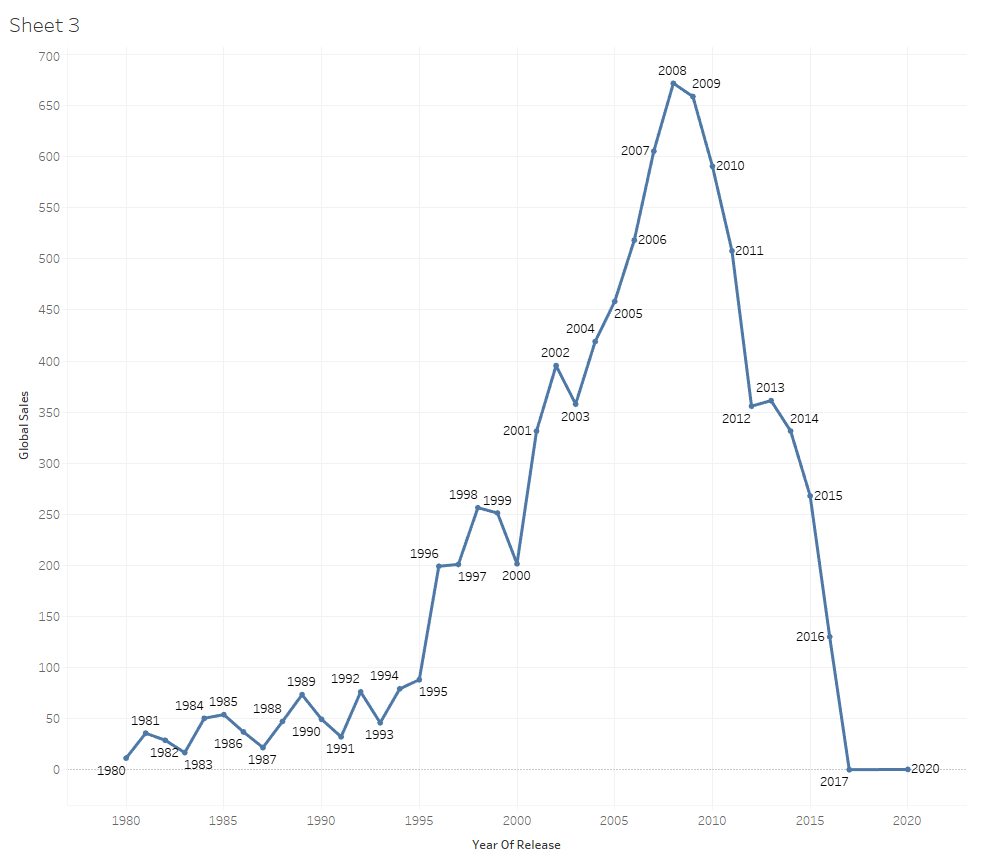